In [57]:
import pandas as pd
data = pd.read_csv("data.csv")
print(data)

       values                       time  year  month  day
0         0.5  2023-07-27T18:30:00+05:30  2023      7   27
1         1.0  2019-06-30T04:30:00+05:30  2019      6   30
2         1.0  2019-07-13T07:30:00+05:30  2019      7   13
3         1.0  2019-07-11T06:30:00+05:30  2019      7   11
4         1.0  2019-07-09T08:30:00+05:30  2019      7    9
...       ...                        ...   ...    ...  ...
45360   223.0  2020-12-27T06:30:00+05:30  2020     12   27
45361   223.0  2020-11-15T00:30:00+05:30  2020     11   15
45362   224.0  2017-03-19T08:30:00+05:30  2017      3   19
45363   224.0  2022-03-18T01:30:00+05:30  2022      3   18
45364   227.0  2022-11-08T01:30:00+05:30  2022     11    8

[45365 rows x 5 columns]


array([[<AxesSubplot:xlabel='year', ylabel='year'>,
        <AxesSubplot:xlabel='month', ylabel='year'>,
        <AxesSubplot:xlabel='day', ylabel='year'>,
        <AxesSubplot:xlabel='values', ylabel='year'>],
       [<AxesSubplot:xlabel='year', ylabel='month'>,
        <AxesSubplot:xlabel='month', ylabel='month'>,
        <AxesSubplot:xlabel='day', ylabel='month'>,
        <AxesSubplot:xlabel='values', ylabel='month'>],
       [<AxesSubplot:xlabel='year', ylabel='day'>,
        <AxesSubplot:xlabel='month', ylabel='day'>,
        <AxesSubplot:xlabel='day', ylabel='day'>,
        <AxesSubplot:xlabel='values', ylabel='day'>],
       [<AxesSubplot:xlabel='year', ylabel='values'>,
        <AxesSubplot:xlabel='month', ylabel='values'>,
        <AxesSubplot:xlabel='day', ylabel='values'>,
        <AxesSubplot:xlabel='values', ylabel='values'>]], dtype=object)

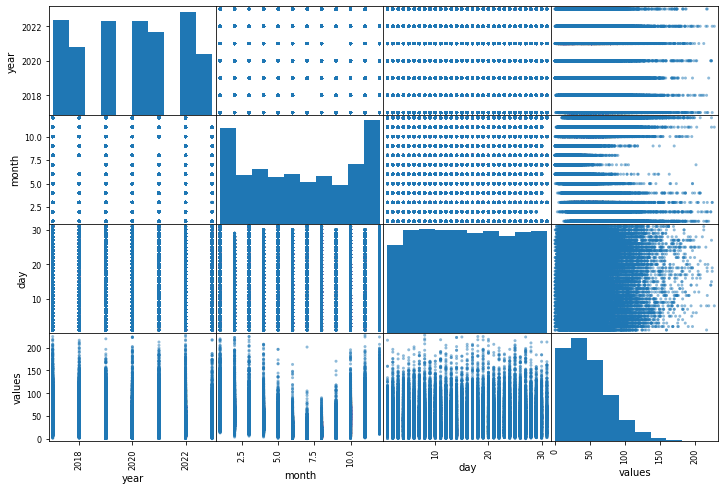

In [79]:
from pandas.plotting import scatter_matrix

attributes = ["year","month","day", "values"]
scatter_matrix(data[attributes], figsize=(12,8))

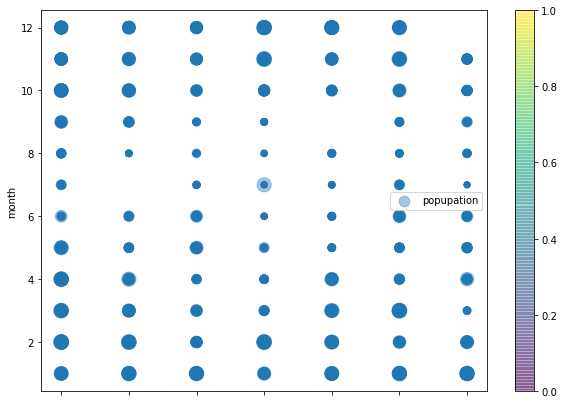

In [80]:
import matplotlib.pyplot as plt

data.plot(kind="scatter", x = 'year', y = 'month' , alpha=0.4, s=data["values"], label="popupation",
            figsize=(10,7), cmap=plt.get_cmap("jet"), colorbar=True, )
plt.legend()

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45365 entries, 0 to 45364
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   values  45365 non-null  float64
 1   time    45365 non-null  object 
 2   year    45365 non-null  int64  
 3   month   45365 non-null  int64  
 4   day     45365 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ MB


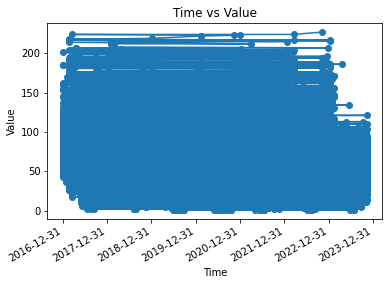

In [60]:
import matplotlib.pyplot as plt
import datetime

# Sample data

# Convert time strings to datetime objects
time_values = [datetime.datetime.strptime(date, "%Y-%m-%dT%H:%M:%S%z") for date in data['time']]

# Plotting
plt.plot(time_values, data['values'], marker='o')

# Formatting the x-axis as dates
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))

# Adding labels and title
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Time vs Value')

# Rotating x-axis labels for better visibility
plt.gcf().autofmt_xdate()

# Show the plot
plt.show()

In [76]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error


data = pd.read_csv("data.csv")

df = pd.DataFrame(data)

# Split the data into features and target variable
X = df[['year', 'month', 'day']]
y = df['values']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree regressor
regressor = DecisionTreeRegressor()

# Train the model
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
x_test = [['2023','11','13']]
y_pred = regressor.predict(x_test)
print(y_pred)

Mean Squared Error: 287.9589162825314
[74.5]
